In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
data=pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [ ]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [ ]:
data=data.drop(['month','day'],axis=1)

In [ ]:
data['rain'].value_counts()

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64

In [ ]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [ ]:
for i in data.columns:
    print(i)
    print(data[i].value_counts(),'\n')

FFMC
91.6    28
92.1    28
91.0    22
91.7    19
93.7    16
        ..
50.4     1
82.1     1
86.3     1
85.1     1
87.1     1
Name: FFMC, Length: 106, dtype: int64 

DMC
99.0     10
129.5     9
142.4     8
231.1     8
137.0     7
         ..
4.6       1
24.9      1
133.6     1
96.3      1
3.2       1
Name: DMC, Length: 215, dtype: int64 

DC
745.3    10
692.6     9
698.6     8
601.4     8
692.3     8
         ..
730.6     1
431.6     1
74.3      1
313.4     1
537.4     1
Name: DC, Length: 219, dtype: int64 

ISI
9.6     23
7.1     21
6.3     20
7.0     17
8.4     17
        ..
7.3      1
12.1     1
14.6     1
56.1     1
22.7     1
Name: ISI, Length: 119, dtype: int64 

temp
17.4    8
19.6    8
15.4    7
20.6    7
23.4    6
       ..
29.6    1
8.7     1
25.7    1
31.0    1
4.8     1
Name: temp, Length: 192, dtype: int64 

RH
27     33
39     24
35     20
43     17
42     17
       ..
84      1
80      1
76      1
69      1
100     1
Name: RH, Length: 75, dtype: int64 

wind
2.2    53
3.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


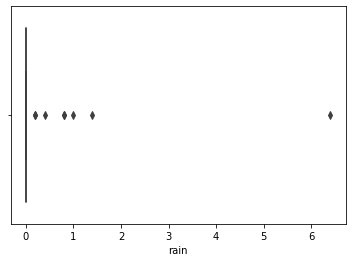

In [ ]:
import seaborn as sns
sns.boxplot(data['rain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


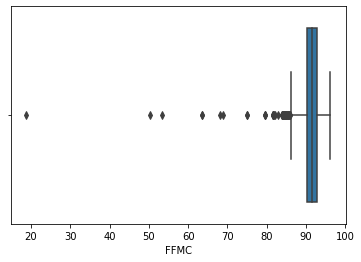

In [ ]:
sns.boxplot(data['FFMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


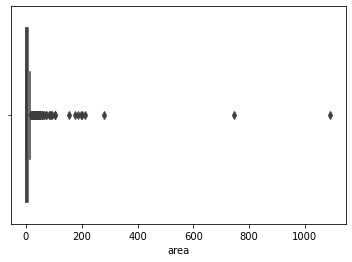

In [ ]:
sns.boxplot(data['area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


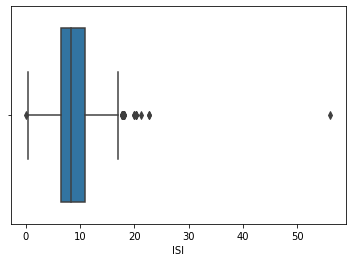

In [ ]:
sns.boxplot(data['ISI'])

In [ ]:
data['rain']=data['rain'].loc[data.rain<2]
data['FFMC']=data['FFMC'].loc[data.FFMC>80]
data['ISI']=data['ISI'].loc[data.ISI<30]
data['area']=data['area'].loc[data.area<400]

In [ ]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [ ]:
data=data.dropna(axis=0)
data.shape

(501, 29)

In [ ]:
# feature Encoding
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Feature selection Using Decision Tree :
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
y=data['area']
x=data.drop(['area'],axis=1)

In [ ]:
dt_model.fit(x,y)
l=dt_model.feature_importances_>0.01
print(np.where(l==True))

(array([ 1,  2,  3,  4,  5,  6, 13, 16, 27]),)


In [ ]:
new_data=data.iloc[:,[ 0,  1,  2,  3,  4,  5,  6, 13, 27]]
new_data

,FFMC,DMC,DC,ISI,temp,RH,wind,daythu,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
...,...,...,...,...,...,...,...,...,...
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0,0


In [ ]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(new_data)
x_scaled.shape

(501, 9)

In [ ]:
features=pd.DataFrame(x_scaled,columns=new_data.columns)
features.shape

(501, 9)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam,Adadelta
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [ ]:
kfold=KFold(n_splits=10)
def create_model():
    model=Sequential([Dense(12,kernel_initializer='normal',activation='relu'),Dense(8,kernel_initializer='normal',activation='relu'),Dense(1,kernel_initializer='normal')])
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error',optimizer=adam)
    return model

In [ ]:
model= create_model()
model_one= model.fit(x_scaled,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
16/16 [==============================] - 22s 2ms/step - loss: 795.9130
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 838.3878
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 835.9177
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 835.3076
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 683.9119
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 620.7939
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 812.6471
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1199.2394
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 625.3256
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 472.2430
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 634.9289
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 1205.6800
Epoch 13/1

In [ ]:
model_one.history.keys()

dict_keys(['loss'])

In [ ]:
y_pred=model.predict(x_scaled)

In [ ]:
y

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
511     0.00
512     6.44
513    54.29
514    11.16
515     0.00
Name: area, Length: 501, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y))

-14.787836791676915


Text(0, 0.5, 'actual value')

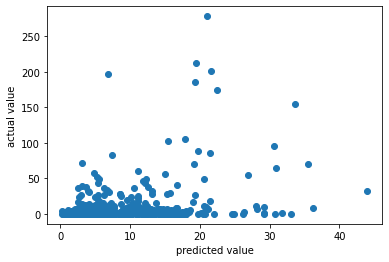

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_pred, y)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=7)

In [ ]:
# train data on base model :
model_2 = model.fit(np.array(x_train) ,np.array(y_train) , epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 2ms/step - loss: 850.9850
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 848.0897
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 848.6697
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 846.3805
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 852.5981
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 842.1608
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 841.6745
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 840.6781
Epoch 9/500
12/12 [==============================] - 0s 3ms/step - loss: 840.7554
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 841.4915
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 849.4115
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 845.9929
Epoch 13/500


In [ ]:
# training accuracy of base model :
y_train_pred = model.predict(x_train)
print("training accuracy :", r2_score(y_train_pred, y_train))     

training accuracy : 0.07994785126926107


In [ ]:
# testing accuracy :
y_test_pred = model.predict(x_test)

print("testing accuracy :", r2_score(y_test_pred, y_test)) #82.95 % testing accuracy

testing accuracy : -0.6680079080384203


In [ ]:
# create general model which is use to find better parameter :
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    m = Sequential()
    m.add(Dense(neuron1,input_dim = 9,kernel_initializer = init,activation = activation_function))
    m.add(Dropout(dropout_rate))
    m.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    m.add(Dropout(dropout_rate))
    m.add(Dense(1,kernel_initializer='normal'))
    
    adam = Adam(lr = learning_rate)
    m.compile(loss = 'mean_squared_error',optimizer = adam)
    return m

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10]
epochs = [100,200,300]
learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [8,14]
neuron2 = [6,9]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(np.array(x_scaled),np.array(y))

print("------------------------------- Done -----------------------------")

[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=6, score=-472.635, total=   5.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=6 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=6, score=-1367.278, total=   5.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=9 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=9, score=-146.374, total=   6.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=14, neuron2=9 


In [44]:
# after applying general model get the best hyperparameters and make another model model_1 :
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    m = Sequential()
    m.add(Dense(neuron1,input_dim = 9,kernel_initializer = init,activation = activation_function))
    m.add(Dropout(dropout_rate))
    m.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    m.add(Dropout(dropout_rate))
    m.add(Dense(1,kernel_initializer='normal'))
    
    adam = Adam(lr = learning_rate)
    m.compile(loss = 'mean_squared_error',optimizer = adam)
    return m

# Create the model

model_1 = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10]
epochs = [300]
learning_rate = [0.01]
dropout_rate = [0.0]
activation_function = ['relu']
init = ['uniform']
neuron1 = [8]
neuron2 = [8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model_1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(np.array(x_scaled),np.array(y))

print("------------------------------- Done -----------------------------")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=-1187.742, total=  10.3s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=-978.973, total=  11.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.5s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=-2086.166, total=  11.1s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.7s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=-492.926, total=  11.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   44.3s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=300, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8, score=-1636.356, total=  11.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.5s finished


------------------------------- Done -----------------------------


In [45]:
# Summarize the results for new model :
print("------------------ Results-----------------------------------------------")
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))
print("********************* Done ************************")

------------------ Results-----------------------------------------------
Best : -1276.432666015625, using {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 300, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 8}
-1276.432666015625,546.8898558357878 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 300, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 8}
********************* Done ************************


In [49]:
# now apply final model on testing and training data :
mse_value, mae_value = final_model.evaluate(x_test, y_test, verbose=0)

print(mse_value)

190.13185119628906


In [50]:
# predict test data :
final_y_test_pred = final_model.predict(x_test)

-0.3663514457334265


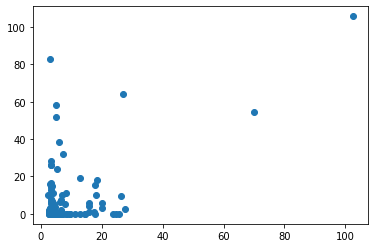

In [51]:
# testing score :
print(r2_score(final_y_test_pred, y_test))    
plt.scatter(final_y_test_pred, y_test)

In [53]:
# training data prediction :
final_y_train_pred = final_model.predict(x_train)
final_y_train_pred

array([[  5.2236166],
       [  6.9785233],
       [  3.2115164],
       [  3.2115164],
       [  3.9842875],
       [  3.2115164],
       [  3.2115164],
       [ 44.87283  ],
       [  7.099326 ],
       [ 45.12648  ],
       [  3.2544363],
       [  3.4434793],
       [  8.179929 ],
       [  2.6024542],
       [  4.5137086],
       [ 19.950708 ],
       [  8.162012 ],
       [ 54.84582  ],
       [  6.5325775],
       [  6.9054174],
       [ 17.835876 ],
       [ 15.279552 ],
       [  7.8523827],
       [  7.2556925],
       [  4.5034685],
       [  8.325796 ],
       [  3.1430242],
       [  3.2062657],
       [ 94.550545 ],
       [  3.4277744],
       [  3.2115164],
       [  2.964961 ],
       [  3.2115164],
       [  2.9104748],
       [  3.2115164],
       [  3.9870696],
       [  2.9936657],
       [  3.2115164],
       [  3.2115164],
       [  2.7375798],
       [  2.8679574],
       [  6.7829275],
       [  8.385285 ],
       [  3.2591982],
       [  3.2115164],
       [  

In [54]:
# accuracy score for training data using final_model :
print(r2_score(final_y_train_pred, y_train))  

-2.2151009113991864


No handles with labels found to put in legend.


Text(0, 0.5, 'Loss')

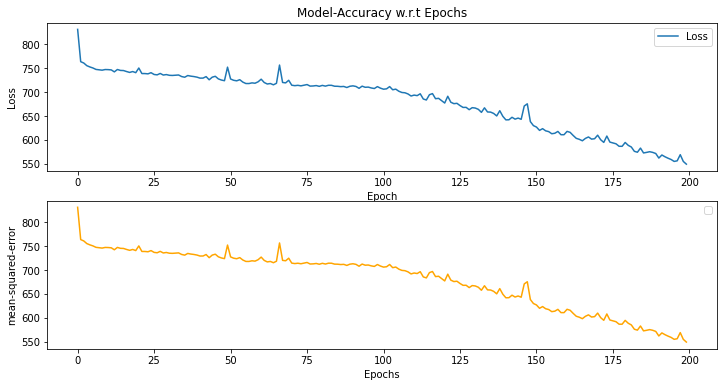

In [55]:
# visulize loss w.r.t epochs :
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['mse'], color='orange')
ax2.legend(loc='upper right')
ax1.plot(history.history['loss'], label='Loss')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("mean-squared-error")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

In [ ]:
# Therefor, we can conclude that model made of extracted feature doesn't give good prediction , Thats why model made of using whole features is good model.